<a href="https://colab.research.google.com/github/leehj2586/ecc-git/blob/main/%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D_1%EC%B0%A8_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
pip install kmodes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/final.csv'

In [ ]:
df = pd.DataFrame(df)

#아웃라이어 제거햇숑 ~~

In [ ]:
import pandas as pd

# 데이터프레임 로드 (예시로 작성, 실제 데이터로 대체 필요)
# df = pd.read_csv('your_data.csv')

# describe()로 요약된 통계 값에서 IQR을 이용해 이상치를 제거하는 코드

def remove_outliers_iqr(df):
    # 숫자형 칼럼만 선택 (원핫 인코딩된 칼럼은 이상치 제거 대상이 아님)
    numeric_columns = ['목표일자리수', '인구밀도']

    # 각 열에 대해 IQR 방식을 적용하여 이상치를 제거
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # IQR 범위 내 데이터만 선택 (1.5*IQR 밖은 이상치로 간주)
        df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

    return df

# 이상치 제거 후 새로운 데이터프레임
df_cleaned = remove_outliers_iqr(df)

# 결과 출력
print(df_cleaned.describe())


         Unnamed: 0        목표일자리수          인구밀도
count  10614.000000  10614.000000  10614.000000
mean    5850.180893     49.197381   3975.326908
std     3402.618413     46.723215   5107.657366
min        2.000000      0.000000     19.540000
25%     2920.250000     14.000000    169.400000
50%     5819.500000     30.000000   1178.050000
75%     8793.750000     70.000000   6573.100000
max    11783.000000    195.000000  17727.420000


In [ ]:
df

,Unnamed: 0,사업유형,사업유형알파벳,사업유형코드,목표일자리수,시도,시군구,인구밀도
0,0,보육시설(어린이집 등) 지원,B,B-01,290,대구광역시,달성군,614.84
1,1,보육시설(어린이집 등) 지원,B,B-01,290,대구광역시,달성군,614.84
2,2,노인 관련 시설지원,B,B-07,13,부산광역시,강서구,787.43
3,3,기타,E,E-19,10,인천광역시,서구,15211.41
4,4,노노케어,A,A-01,83,서울특별시,관악구,16425.40
...,...,...,...,...,...,...,...,...
11780,11780,공원 놀이터 등 공공시설 봉사,A,A-13,100,강원도,강릉시,204.63
11781,11781,노인맞춤돌봄서비스 지원,B,B-08,6,서울특별시,중구,12299.10
11782,11782,기타,E,E-07,11,경기도,이천시,483.62
11783,11783,공원 놀이터 등 공공시설 봉사,A,A-13,130,전라북도,진안군,31.67


In [ ]:
df['사업유형알파벳'].value_counts()

,count
사업유형알파벳,
A,6615
B,2850
E,2320


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes

df1 = df[['사업유형알파벳','목표일자리수','인구밀도']]
df1

,사업유형알파벳,목표일자리수,인구밀도
0,B,290,614.84
1,B,290,614.84
2,B,13,787.43
3,E,10,15211.41
4,A,83,16425.40
...,...,...,...
11780,A,100,204.63
11781,B,6,12299.10
11782,E,11,483.62
11783,A,130,31.67


In [ ]:
df1.describe()

,목표일자리수,인구밀도
count,11785.000000,11785.000000
mean,71.458804,4481.339023
std,160.681052,5915.726761
min,0.000000,19.540000
25%,15.000000,177.240000
50%,34.000000,1268.230000
75%,87.000000,7193.570000
max,11962.000000,25692.250000


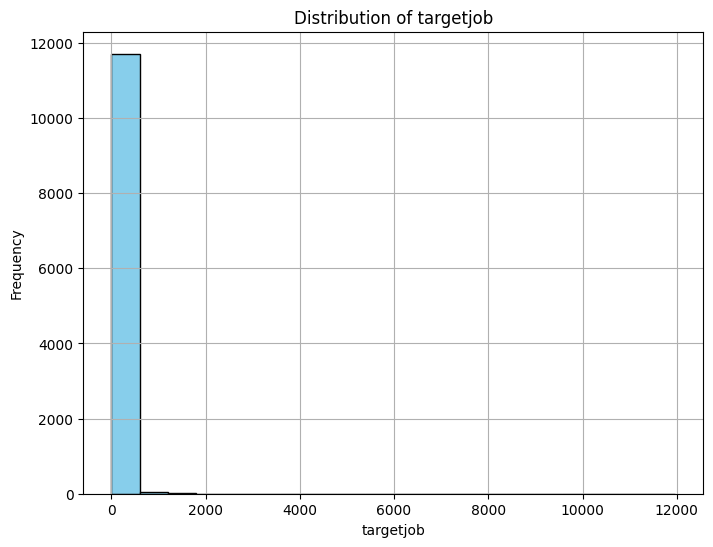

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램으로 목표일자리수의 분포 시각화
plt.figure(figsize=(8, 6))
plt.hist(df1['목표일자리수'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of targetjob')
plt.xlabel('targetjob')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# 이상치제거했는데 목표일자리수가 이래서 로그변환함

<ipython-input-53-565e9fa08846>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['log_목표일자리수'] = np.log1p(df1['목표일자리수'])


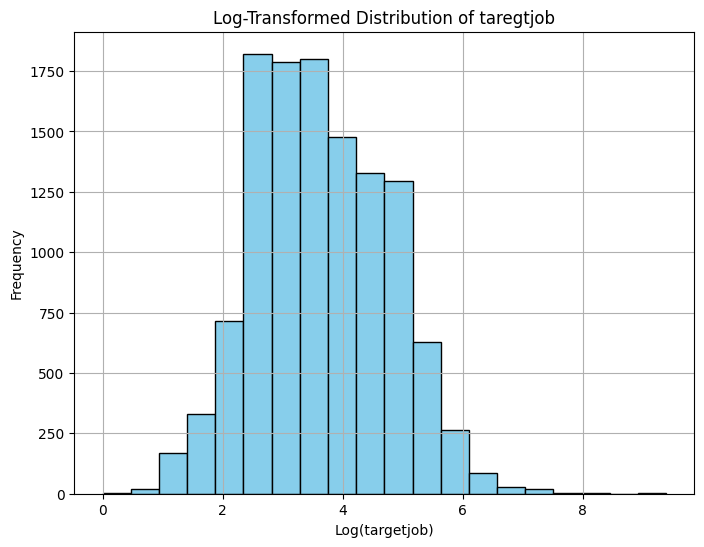

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 목표일자리수에 1을 더한 후 로그 변환 (값이 0인 경우 대비)
df1['log_목표일자리수'] = np.log1p(df1['목표일자리수'])

# 히스토그램으로 로그 변환한 목표일자리수의 분포 시각화
plt.figure(figsize=(8, 6))
plt.hist(df1['log_목표일자리수'], bins=20, color='skyblue', edgecolor='black')
plt.title('Log-Transformed Distribution of taregtjob')
plt.xlabel('Log(targetjob)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
df2 = df1.drop('목표일자리수',axis=1)
df2

,사업유형알파벳,인구밀도,log_목표일자리수
0,B,614.84,5.673323
1,B,614.84,5.673323
2,B,787.43,2.639057
3,E,15211.41,2.397895
4,A,16425.40,4.430817
...,...,...,...
11780,A,204.63,4.615121
11781,B,12299.10,1.945910
11782,E,483.62,2.484907
11783,A,31.67,4.875197


In [ ]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

# 범주형 열 인덱스
categorical_columns_index = [0]  # 'category_col'은 범주형 데이터

# 엘보우 방법을 통해 최적의 클러스터 수 찾기
cost = []
K = range(1, 5)  # 1부터 10개의 클러스터 개수까지 시도

for num_clusters in K:
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', verbose=0)
    kproto.fit_predict(df2, categorical=categorical_columns_index)
    cost.append(kproto.cost_)

# 엘보우 그래프 시각화
plt.figure(figsize=(8, 6))
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost (Sum of Squared Errors)')
plt.title('Elbow Method For Optimal k')
plt.show()


KeyboardInterrupt: 

# 최적의 클러스터는 2개 !

근데 결과가 ㅈ같아서 3개로도 해봄 3개가 나은거같아 우리가 쓰기에

In [ ]:
# 범주형 열의 인덱스
categorical_columns_index = [0]  # 'categorical_columns_index'은 범주형 데이터

# K-Prototype 모델 정의 및 학습
kproto = KPrototypes(n_clusters=2, init='Huang', verbose=2)
clusters = kproto.fit_predict(df2, categorical=categorical_columns_index)

# 클러스터 결과를 데이터프레임에 추가
df2['cluster'] = clusters

df2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1066, ncost: 97252548878.3537
Run: 1, iteration: 2/100, moves: 322, ncost: 95380946972.91086
Run: 1, iteration: 3/100, moves: 316, ncost: 93725624138.48744
Run: 1, iteration: 4/100, moves: 87, ncost: 93569050439.4625
Run: 1, iteration: 5/100, moves: 0, ncost: 93569050439.4625
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2279, ncost: 101590704727.89464
Run: 2, iteration: 2/100, moves: 623, ncost: 95825175032.0996
Run: 2, iteration: 3/100, moves: 347, ncost: 93934964405.63884
Run: 2, iteration: 4/100, moves: 135, ncost: 93569050439.46225
Run: 2, iteration: 5/100, moves: 0, ncost: 93569050439.46225
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 153, ncost: 93569050439.46243
Run: 3, iteration: 2/100, moves: 0, ncost: 93569050439.46243
Init: initia

,사업유형알파벳,인구밀도,log_목표일자리수,cluster
0,B,614.84,5.673323,0
1,B,614.84,5.673323,0
2,B,787.43,2.639057,0
3,E,15211.41,2.397895,1
4,A,16425.40,4.430817,1
...,...,...,...,...
11780,A,204.63,4.615121,0
11781,B,12299.10,1.945910,1
11782,E,483.62,2.484907,0
11783,A,31.67,4.875197,0


In [ ]:
df2 = pd.DataFrame(df2)

# cluster와 사업유형알파벳으로 그룹화하고 각 그룹의 개수를 계산
result = df2.groupby(['cluster', '사업유형알파벳']).size().unstack(fill_value=0)

# 결과 출력
print(result)

사업유형알파벳     A     B     E
cluster                  
0        5092  2288  1873
1        1523   562   447


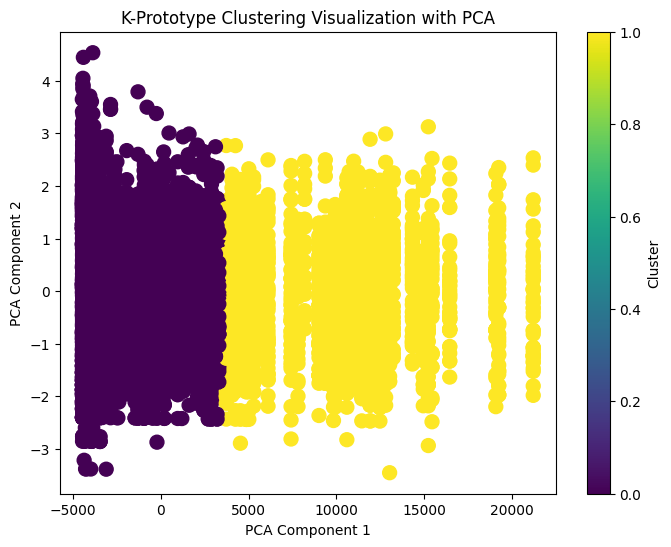

In [ ]:
# 클러스터 결과를 데이터프레임에 추가
df2['cluster'] = clusters

# 범주형 데이터를 숫자로 변환하여 PCA를 수행할 수 있도록 준비
data_encoded = df2.copy()
data_encoded['사업유형알파벳'] = data_encoded['사업유형알파벳'].astype('category').cat.codes

# PCA를 사용하여 2D로 차원 축소
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_encoded[['사업유형알파벳', 'log_목표일자리수', '인구밀도']])

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df2['cluster'], cmap='viridis', s=100)
plt.title('K-Prototype Clustering Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

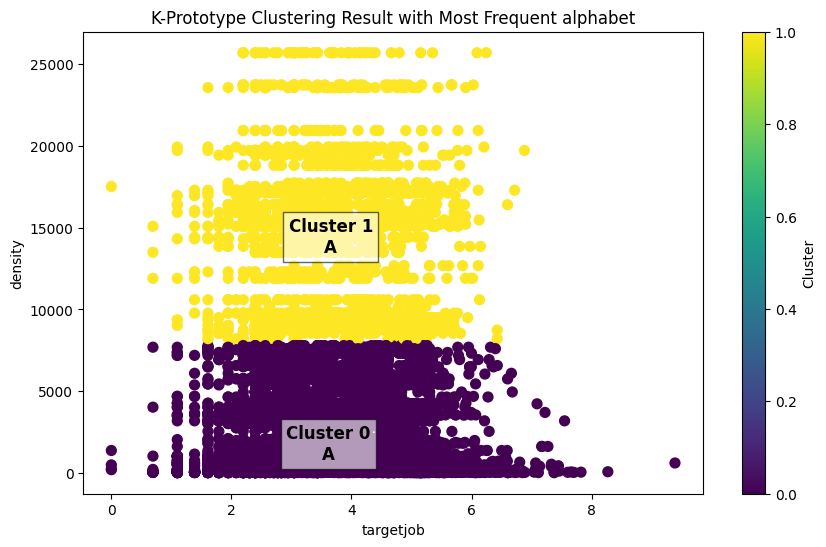

In [ ]:
import matplotlib.pyplot as plt

# 각 클러스터별로 '사업유형알파벳' 빈도수 계산
cluster_centroid_info = df2.groupby('cluster')['사업유형알파벳'].agg(lambda x: x.value_counts().index[0])

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))

# 각 클러스터에 대해 다른 색상으로 산점도 표시
scatter = plt.scatter(df2['log_목표일자리수'], df2['인구밀도'], c=df2['cluster'], cmap='viridis', s=50)

# 색상 막대 추가 (cluster를 색상으로 구분)
plt.colorbar(scatter, label='Cluster')

# 각 클러스터의 중심부에 가장 빈도수가 높은 '사업유형알파벳' 표시
for cluster_num, centroid_alphabet in cluster_centroid_info.items():
    # 해당 클러스터의 데이터 포인트들의 평균 좌표 (중앙에 표시)
    cluster_data = df2[df2['cluster'] == cluster_num]
    mean_x = cluster_data['log_목표일자리수'].mean()
    mean_y = cluster_data['인구밀도'].mean()

    # 텍스트 추가
    plt.text(mean_x, mean_y, f'Cluster {cluster_num}\n{centroid_alphabet}',
             fontsize=12, fontweight='bold', color='black',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6))

# 축 라벨 및 제목 설정
plt.xlabel('targetjob')
plt.ylabel('density')
plt.title('K-Prototype Clustering Result with Most Frequent alphabet')

# 시각화 표시
plt.show()

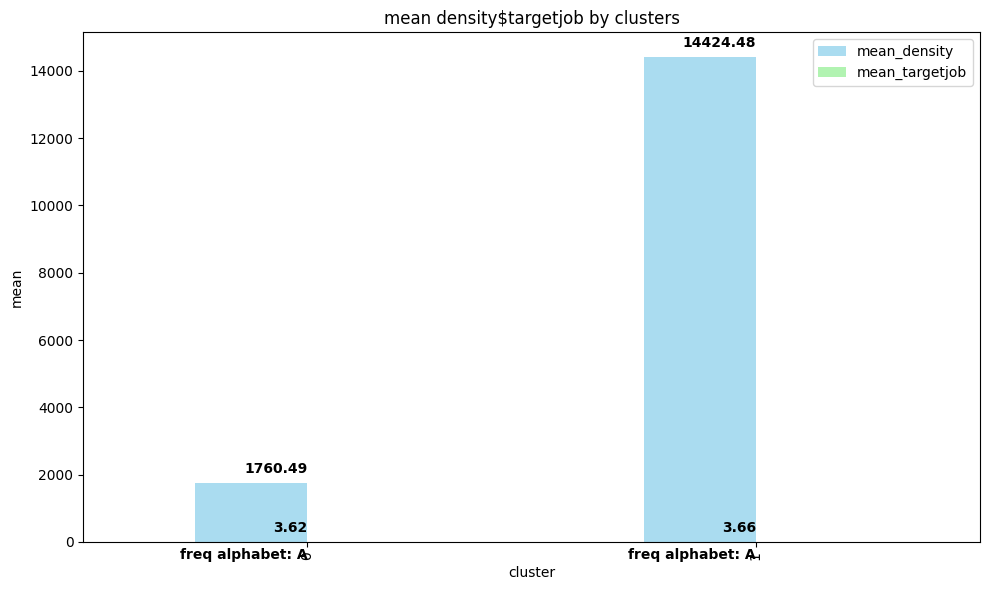

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 클러스터별로 '사업유형알파벳'의 최빈값 구하기
most_frequent_alphabet = df2.groupby('cluster')['사업유형알파벳'].agg(lambda x: x.value_counts().index[0])

# 각 클러스터별 '인구밀도'와 'log_목표일자리수'의 평균값 구하기
cluster_means = df2.groupby('cluster')[['인구밀도', 'log_목표일자리수']].mean()

# 시각화 준비
fig, ax1 = plt.subplots(figsize=(10, 6))

# 인구밀도와 log_목표일자리수 평균값 막대 그래프 그리기
cluster_means.columns = ['mean_density', 'mean_targetjob']
bars = cluster_means.plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen'], alpha=0.7)

# Y축 레이블 설정
ax1.set_ylabel('mean')
ax1.set_title('mean density$targetjob by clusters')

# 각 클러스터에 대한 최빈값 텍스트 표시
for idx, cluster_num in enumerate(cluster_means.index):
    most_freq = most_frequent_alphabet[cluster_num]

    # 인구밀도 막대 위에 값 표시
    mean_density = cluster_means.loc[cluster_num, 'mean_density']
    ax1.text(idx, mean_density + 300, f'{mean_density:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # log_목표일자리수 막대 위에 값 표시
    mean_targetjob = cluster_means.loc[cluster_num, 'mean_targetjob']
    ax1.text(idx, mean_targetjob + 300, f'{mean_targetjob:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # 각 클러스터에 대한 최빈값 텍스트 표시 (막대 아래에)
    ax1.text(idx, -500, f'freq alphabet: {most_freq}', ha='right', fontsize=10, fontweight='bold', color='black')

# 레전드 추가
plt.legend(['mean_density', 'mean_targetjob'], loc='upper right')

# 시각화 보여주기
plt.tight_layout()
plt.show()

###군집화는 k-prototype이라고 범주형 + 연속형 변수일때 사용할 수 있는 군집화방법 사용함


사업유형알파벳은 최빈값 이용해서 대표했고, 인구밀도랑 목표일자리수는 평균값 사용해서 나타냄 나지금 새벽이라 시각화대충했는데 최종파일만들때는 좀더 보완해야될듯 대푯값내는 방법 등 좀더 고민해서 . . .

암튼 결과는

클러스터 0 : 인구밀도 낮음, 목표일자리수 낮음, 최다 사업유형 = A,

클러스터 1 : 인구밀도 높음, 목표일자리수 상위권, 최다 사업유형 = A


이거로 봤을 때 그냥 사회에서 가장 선호하는(쉽게 창출할 수 있는) 일자리 유형이 A인것 같다는 생각이 들었음. 그래서 이걸 그대로 제출하기는 먼가 ?스러운 면이 있어서 좀더 회의해보자 ..

# 이건 뭔가 잘못된거같아서 클러스터 3으로 다시해봄

In [ ]:
# 범주형 열의 인덱스
categorical_columns_index = [0]  # 'categorical_columns_index'은 범주형 데이터

# K-Prototype 모델 정의 및 학습
kproto = KPrototypes(n_clusters=3, init='Huang', verbose=2)
clusters = kproto.fit_predict(df2, categorical=categorical_columns_index)

# 클러스터 결과를 데이터프레임에 추가
df2['cluster'] = clusters

df2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4973, ncost: 47498684301.810196
Run: 1, iteration: 2/100, moves: 1261, ncost: 34721670911.41012
Run: 1, iteration: 3/100, moves: 444, ncost: 33952554550.27359
Run: 1, iteration: 4/100, moves: 312, ncost: 33558452658.91413
Run: 1, iteration: 5/100, moves: 11, ncost: 33557809174.678955
Run: 1, iteration: 6/100, moves: 0, ncost: 33557809174.678955
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1970, ncost: 41195219223.72559
Run: 2, iteration: 2/100, moves: 754, ncost: 34432398179.68451
Run: 2, iteration: 3/100, moves: 367, ncost: 33858943575.28348
Run: 2, iteration: 4/100, moves: 255, ncost: 33557941946.345375
Run: 2, iteration: 5/100, moves: 5, ncost: 33557809174.678936
Run: 2, iteration: 6/100, moves: 0, ncost: 33557809174.678936
Init: initializing centro

,사업유형알파벳,인구밀도,log_목표일자리수,cluster
0,B,614.84,5.673323,2
1,B,614.84,5.673323,2
2,B,787.43,2.639057,2
3,E,15211.41,2.397895,1
4,A,16425.40,4.430817,1
...,...,...,...,...
11780,A,204.63,4.615121,2
11781,B,12299.10,1.945910,1
11782,E,483.62,2.484907,2
11783,A,31.67,4.875197,2


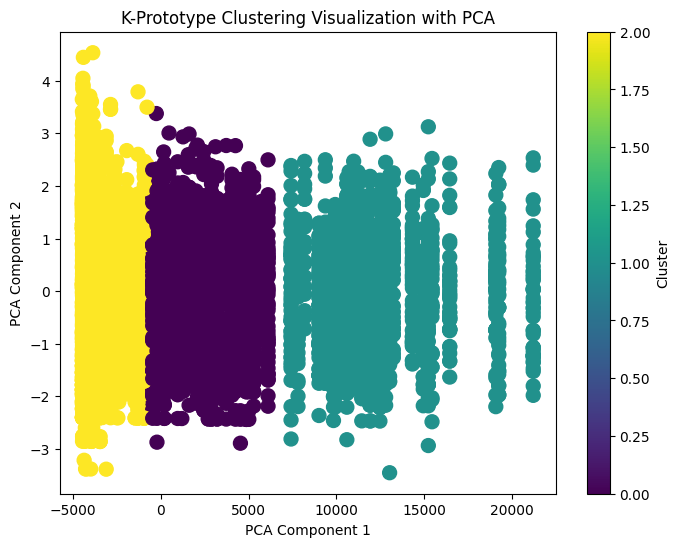

In [ ]:
# 클러스터 결과를 데이터프레임에 추가
df2['cluster'] = clusters

# 범주형 데이터를 숫자로 변환하여 PCA를 수행할 수 있도록 준비
data_encoded = df2.copy()
data_encoded['사업유형알파벳'] = data_encoded['사업유형알파벳'].astype('category').cat.codes

# PCA를 사용하여 2D로 차원 축소
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_encoded[['사업유형알파벳', 'log_목표일자리수', '인구밀도']])

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df2['cluster'], cmap='viridis', s=100)
plt.title('K-Prototype Clustering Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
df2 = pd.DataFrame(df2)

# cluster와 사업유형알파벳으로 그룹화하고 각 그룹의 개수를 계산
result = df2.groupby(['cluster', '사업유형알파벳']).size().unstack(fill_value=0)

# 결과 출력
print(result)

사업유형알파벳     A     B     E
cluster                  
0        1493   561   455
1        1063   385   311
2        4059  1904  1554


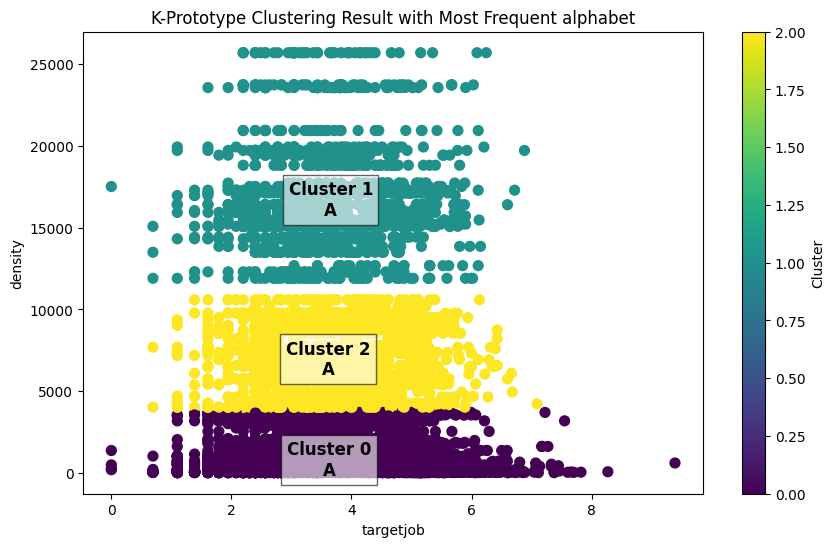

In [ ]:
import matplotlib.pyplot as plt

# 각 클러스터별로 '사업유형알파벳' 빈도수 계산
cluster_centroid_info = df2.groupby('cluster')['사업유형알파벳'].agg(lambda x: x.value_counts().index[0])

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))

# 각 클러스터에 대해 다른 색상으로 산점도 표시
scatter = plt.scatter(df2['log_목표일자리수'], df2['인구밀도'], c=df2['cluster'], cmap='viridis', s=50)

# 색상 막대 추가 (cluster를 색상으로 구분)
plt.colorbar(scatter, label='Cluster')

# 각 클러스터의 중심부에 가장 빈도수가 높은 '사업유형알파벳' 표시
for cluster_num, centroid_alphabet in cluster_centroid_info.items():
    # 해당 클러스터의 데이터 포인트들의 평균 좌표 (중앙에 표시)
    cluster_data = df2[df2['cluster'] == cluster_num]
    mean_x = cluster_data['log_목표일자리수'].mean()
    mean_y = cluster_data['인구밀도'].mean()

    # 텍스트 추가
    plt.text(mean_x, mean_y, f'Cluster {cluster_num}\n{centroid_alphabet}',
             fontsize=12, fontweight='bold', color='black',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6))

# 축 라벨 및 제목 설정
plt.xlabel('targetjob')
plt.ylabel('density')
plt.title('K-Prototype Clustering Result with Most Frequent alphabet')

# 시각화 표시
plt.show()

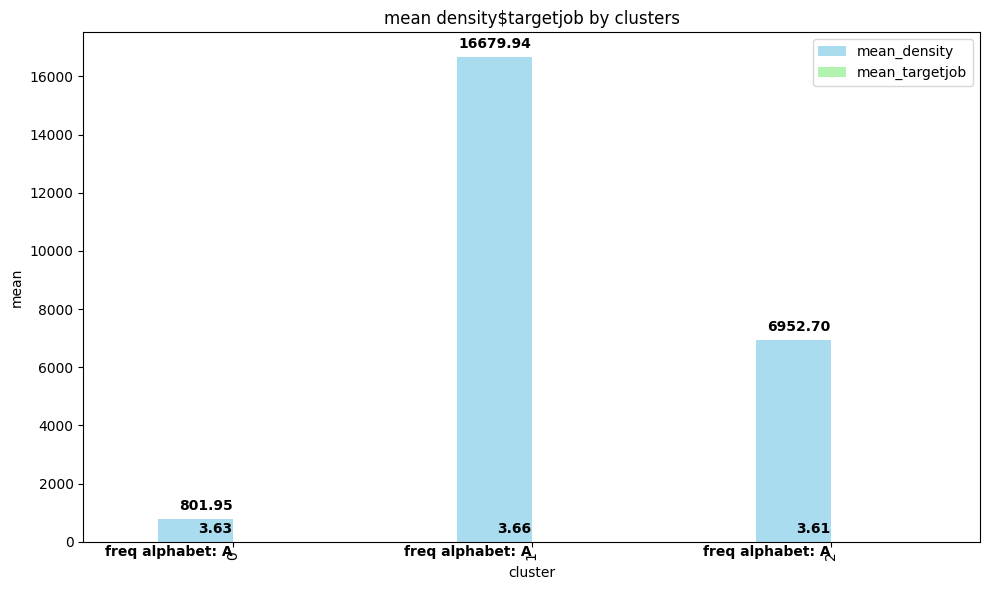

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 클러스터별로 '사업유형알파벳'의 최빈값 구하기
most_frequent_alphabet = df2.groupby('cluster')['사업유형알파벳'].agg(lambda x: x.value_counts().index[0])

# 각 클러스터별 '인구밀도'와 'log_목표일자리수'의 평균값 구하기
cluster_means = df2.groupby('cluster')[['인구밀도', 'log_목표일자리수']].mean()

# 시각화 준비
fig, ax1 = plt.subplots(figsize=(10, 6))

# 인구밀도와 log_목표일자리수 평균값 막대 그래프 그리기
cluster_means.columns = ['mean_density', 'mean_targetjob']
bars = cluster_means.plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen'], alpha=0.7)

# Y축 레이블 설정
ax1.set_ylabel('mean')
ax1.set_title('mean density$targetjob by clusters')

# 각 클러스터에 대한 최빈값 텍스트 표시
for idx, cluster_num in enumerate(cluster_means.index):
    most_freq = most_frequent_alphabet[cluster_num]

    # 인구밀도 막대 위에 값 표시
    mean_density = cluster_means.loc[cluster_num, 'mean_density']
    ax1.text(idx, mean_density + 300, f'{mean_density:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # log_목표일자리수 막대 위에 값 표시
    mean_targetjob = cluster_means.loc[cluster_num, 'mean_targetjob']
    ax1.text(idx, mean_targetjob + 300, f'{mean_targetjob:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # 각 클러스터에 대한 최빈값 텍스트 표시 (막대 아래에)
    ax1.text(idx, -500, f'freq alphabet: {most_freq}', ha='right', fontsize=10, fontweight='bold', color='black')

# 레전드 추가
plt.legend(['mean_density', 'mean_targetjob'], loc='upper right')

# 시각화 보여주기
plt.tight_layout()
plt.show()

In [ ]:
df2 = pd.get_dummies(df2, columns=['사업유형알파벳'],dtype = int)
df2

# 클러스터별 평균값 계산
cluster_means = df2[[ '인구밀도', '사업유형알파벳_A', '사업유형알파벳_B','사업유형알파벳_E', 'cluster']].groupby('cluster').mean()

# 결과 출력
print(cluster_means)

                 인구밀도  사업유형알파벳_A  사업유형알파벳_B  사업유형알파벳_E
cluster                                               
0         6952.696006   0.595058   0.223595   0.181347
1        16679.942064   0.604321   0.218874   0.176805
2          801.948652   0.539976   0.253293   0.206731


# 결과는

클러스터 0 : 인구밀도 높음, 목표일자리수 상위권, 최다 사업유형 = A,

클러스터 1 : 인구밀도 중간, 목표일자리수 하위권, 최다 사업유형 = A

클러스터 2 : 인구밀도 낮음, 목표일자리수 중위권, 최다 사업유형 = A

In [ ]:
df2

,인구밀도,log_목표일자리수,cluster,사업유형알파벳_A,사업유형알파벳_B,사업유형알파벳_E
0,614.84,5.673323,2,0,1,0
1,614.84,5.673323,2,0,1,0
2,787.43,2.639057,2,0,1,0
3,15211.41,2.397895,1,0,0,1
4,16425.40,4.430817,1,1,0,0
...,...,...,...,...,...,...
11780,204.63,4.615121,2,1,0,0
11781,12299.10,1.945910,1,0,1,0
11782,483.62,2.484907,2,0,0,1
11783,31.67,4.875197,2,1,0,0


# 혹시몰라서 클러스터 로그변환 안한 데이터로도 해봤는데 크게 유의미하게 달라지진 않음 특히 목표일자리수에서.... 쟤 왜저러지?

로그변환한값이라 저래보일수잇는데 로그변환ㅇ해서 그나마 차이가 저렇게 벌어진거... 목표일자리수 로그변환안하고 원데이터 그대로 나타내면 80,88,500 막이래 ;;

# 그래서 클러스터 2개+ 로그변환X로 다시해봣는데 흐음....

In [ ]:
 # 범주형 열의 인덱스
categorical_columns_index = [0]  # 'categorical_columns_index'은 범주형 데이터

# K-Prototype 모델 정의 및 학습
kproto = KPrototypes(n_clusters=3, init='Huang', verbose=2)
clusters = kproto.fit_predict(df1, categorical=categorical_columns_index)

# 클러스터 결과를 데이터프레임에 추가
df1['cluster'] = clusters

df1

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4827, ncost: 76029289397.30116
Run: 1, iteration: 2/100, moves: 2702, ncost: 39982000496.89617
Run: 1, iteration: 3/100, moves: 760, ncost: 34686470658.1795
Run: 1, iteration: 4/100, moves: 394, ncost: 34050448238.73327
Run: 1, iteration: 5/100, moves: 196, ncost: 33861512091.931313
Run: 1, iteration: 6/100, moves: 0, ncost: 33861512091.931313
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3173, ncost: 63304295664.69284
Run: 2, iteration: 2/100, moves: 1835, ncost: 37209925675.457634
Run: 2, iteration: 3/100, moves: 561, ncost: 34562930653.72356
Run: 2, iteration: 4/100, moves: 396, ncost: 33908993915.512775
Run: 2, iteration: 5/100, moves: 96, ncost: 33861512091.931335
Run: 2, iteration: 6/100, moves: 0, ncost: 33861512091.931335
Init: initializing centroids
Init: initializing clusters
Starting iterations...


<ipython-input-25-1941749659e7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster'] = clusters


,사업유형알파벳,목표일자리수,인구밀도,log_목표일자리수,cluster
0,B,290,614.84,5.673323,1
1,B,290,614.84,5.673323,1
2,B,13,787.43,2.639057,1
3,E,10,15211.41,2.397895,2
4,A,83,16425.40,4.430817,2
...,...,...,...,...,...
11780,A,100,204.63,4.615121,1
11781,B,6,12299.10,1.945910,2
11782,E,11,483.62,2.484907,1
11783,A,130,31.67,4.875197,1


<ipython-input-26-8513eed5296d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster'] = clusters


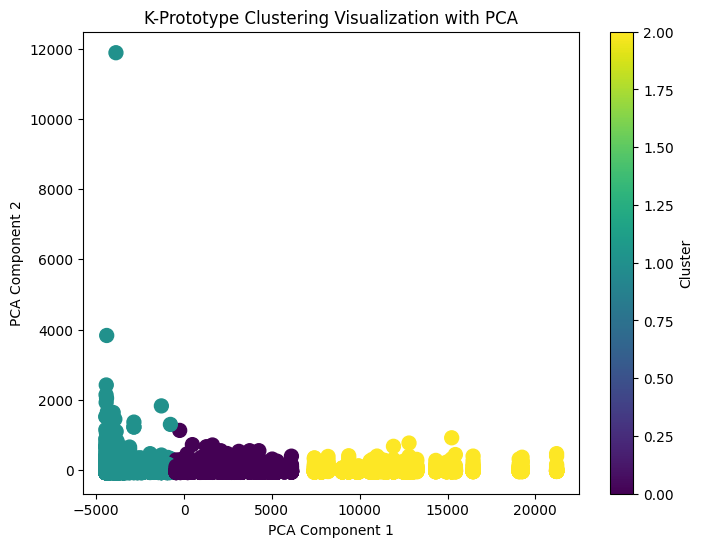

In [ ]:
# 클러스터 결과를 데이터프레임에 추가
df1['cluster'] = clusters

# 범주형 데이터를 숫자로 변환하여 PCA를 수행할 수 있도록 준비
data_encoded = df1.copy()
data_encoded['사업유형알파벳'] = data_encoded['사업유형알파벳'].astype('category').cat.codes

# PCA를 사용하여 2D로 차원 축소
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_encoded[['사업유형알파벳', '목표일자리수', '인구밀도']])

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df1['cluster'], cmap='viridis', s=100)
plt.title('K-Prototype Clustering Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

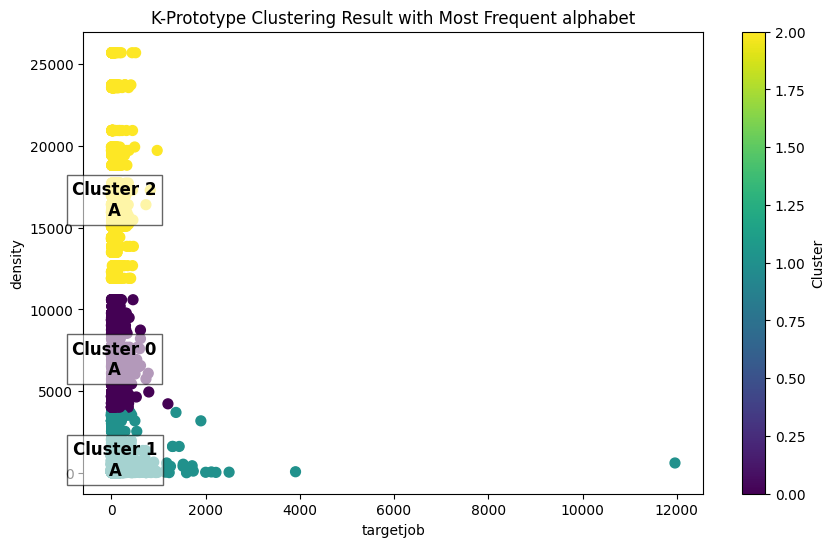

In [ ]:
import matplotlib.pyplot as plt

# 각 클러스터별로 '사업유형알파벳' 빈도수 계산
cluster_centroid_info = df1.groupby('cluster')['사업유형알파벳'].agg(lambda x: x.value_counts().index[0])

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))

# 각 클러스터에 대해 다른 색상으로 산점도 표시
scatter = plt.scatter(df1['목표일자리수'], df1['인구밀도'], c=df1['cluster'], cmap='viridis', s=50)

# 색상 막대 추가 (cluster를 색상으로 구분)
plt.colorbar(scatter, label='Cluster')

# 각 클러스터의 중심부에 가장 빈도수가 높은 '사업유형알파벳' 표시
for cluster_num, centroid_alphabet in cluster_centroid_info.items():
    # 해당 클러스터의 데이터 포인트들의 평균 좌표 (중앙에 표시)
    cluster_data = df1[df1['cluster'] == cluster_num]
    mean_x = cluster_data['목표일자리수'].mean()
    mean_y = cluster_data['인구밀도'].mean()

    # 텍스트 추가
    plt.text(mean_x, mean_y, f'Cluster {cluster_num}\n{centroid_alphabet}',
             fontsize=12, fontweight='bold', color='black',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6))

# 축 라벨 및 제목 설정
plt.xlabel('targetjob')
plt.ylabel('density')
plt.title('K-Prototype Clustering Result with Most Frequent alphabet')

# 시각화 표시
plt.show()


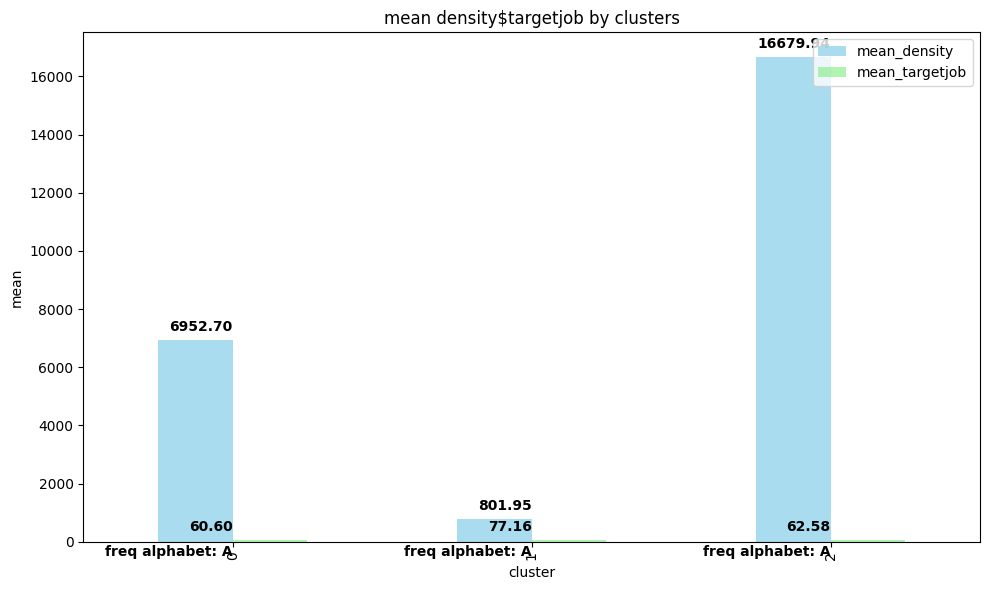

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 클러스터별로 '사업유형알파벳'의 최빈값 구하기
most_frequent_alphabet = df1.groupby('cluster')['사업유형알파벳'].agg(lambda x: x.value_counts().index[0])

# 각 클러스터별 '인구밀도'와 '목표일자리수'의 평균값 구하기
cluster_means = df1.groupby('cluster')[['인구밀도', '목표일자리수']].mean()

# 시각화 준비
fig, ax1 = plt.subplots(figsize=(10, 6))

# 인구밀도와 목표일자리수 평균값 막대 그래프 그리기
cluster_means.columns = ['mean_density', 'mean_targetjob']
bars = cluster_means.plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen'], alpha=0.7)

# Y축 레이블 설정
ax1.set_ylabel('mean')
ax1.set_title('mean density$targetjob by clusters')

# 각 클러스터에 대한 최빈값 텍스트 표시
for idx, cluster_num in enumerate(cluster_means.index):
    most_freq = most_frequent_alphabet[cluster_num]

    # 인구밀도 막대 위에 값 표시
    mean_density = cluster_means.loc[cluster_num, 'mean_density']
    ax1.text(idx, mean_density + 300, f'{mean_density:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # 목표일자리수 막대 위에 값 표시
    mean_targetjob = cluster_means.loc[cluster_num, 'mean_targetjob']
    ax1.text(idx, mean_targetjob + 300, f'{mean_targetjob:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # 각 클러스터에 대한 최빈값 텍스트 표시 (막대 아래에)
    ax1.text(idx, -500, f'freq alphabet: {most_freq}', ha='right', fontsize=10, fontweight='bold', color='black')

# 레전드 추가
plt.legend(['mean_density', 'mean_targetjob'], loc='upper right')

# 시각화 보여주기
plt.tight_layout()
plt.show()


In [ ]:
df2

,Unnamed: 0,사업유형,사업유형알파벳,사업유형코드,목표일자리수,시도,시군구,인구밀도
0,0,보육시설(어린이집 등) 지원,B,B-01,290,대구광역시,달성군,614.84
1,1,보육시설(어린이집 등) 지원,B,B-01,290,대구광역시,달성군,614.84
2,2,노인 관련 시설지원,B,B-07,13,부산광역시,강서구,787.43
3,3,기타,E,E-19,10,인천광역시,서구,15211.41
4,4,노노케어,A,A-01,83,서울특별시,관악구,16425.40
...,...,...,...,...,...,...,...,...
11780,11780,공원 놀이터 등 공공시설 봉사,A,A-13,100,강원도,강릉시,204.63
11781,11781,노인맞춤돌봄서비스 지원,B,B-08,6,서울특별시,중구,12299.10
11782,11782,기타,E,E-07,11,경기도,이천시,483.62
11783,11783,공원 놀이터 등 공공시설 봉사,A,A-13,130,전라북도,진안군,31.67
